In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../athlete_events.csv")
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [3]:
df[df["NOC"] == "URS"].sort_values(by="Year")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
269299,134752,Lyubov Yegorovna Zhigalova,F,28.0,NaN,NaN,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Diving,Diving Women's Springboard,NaN
98818,50011,Mariya Kindrativna Horokhovska,F,30.0,NaN,NaN,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Women's Balance Beam,Silver
98812,50011,Mariya Kindrativna Horokhovska,F,30.0,NaN,NaN,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Women's Individual All-Around,Gold
98813,50011,Mariya Kindrativna Horokhovska,F,30.0,NaN,NaN,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Women's Team All-Around,Gold
98814,50011,Mariya Kindrativna Horokhovska,F,30.0,NaN,NaN,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Women's Team Portable Apparatus,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,546,Inna Vladimirovna Abramova,F,21.0,172.0,63.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,NaN
270973,135502,"Nataliya Maratovna ""Natasha"" Zvereva",F,17.0,172.0,60.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Tennis,Tennis Women's Singles,NaN
270974,135502,"Nataliya Maratovna ""Natasha"" Zvereva",F,17.0,172.0,60.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Tennis,Tennis Women's Doubles,NaN
969,546,Inna Vladimirovna Abramova,F,21.0,172.0,63.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Women's 50 metres Freestyle,NaN


<Axes: xlabel='Age', ylabel='Height'>

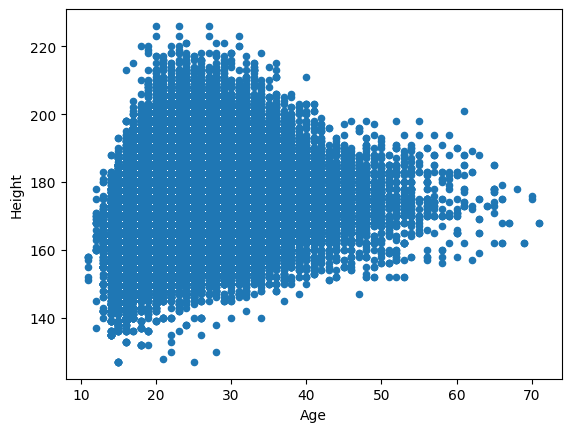

In [4]:
df.plot(x="Age", y="Height", kind="scatter")

In [5]:
import sys
sys.path.append("..") # Adds higher directory to python modules path.

from data_utils import plot_top_medals

plot_top_medals(df)

Medal  Bronze  Gold  Silver
NOC                        
AFG         2     0       0
AHO         0     0       1
ALG         8     5       4
ANZ         5    20       4
ARG        91    91      92
..        ...   ...     ...
VIE         0     1       3
WIF         5     0       0
YUG        93   130     167
ZAM         1     0       1
ZIM         1    17       4

[149 rows x 3 columns]
